# Pandas

Pandas is a Python library for loading, manipulating, and plotting data.
A good resource to get started is the [User Guide](https://pandas.pydata.org/docs/user_guide/index.html).

Once you're familiar with the style, keep the [full API reference](https://pandas.pydata.org/docs/reference/index.html) handy. 

In [1]:
import pandas as pd
#import numpy as np # numpy
import matplotlib.pyplot as plt

In [2]:
football_data = { 'year': [
2010, 2011, 2012,
2010, 2011, 2012,
2010, 2011, 2012
],
'team': [
    'FCBarcelona', 'FCBarcelona',
    'FCBarcelona', 'RMadrid',
    'RMadrid', 'RMadrid',
    'ValenciaCF', 'ValenciaCF',
    'ValenciaCF'
],
'wins':[30 , 28 , 32 , 29 , 32 , 26 , 21 , 17 , 19] ,
'draws': [6 , 7 , 4 , 5 , 4 , 7 , 8 , 10 , 8] ,
'losses': [2 , 3 , 2 , 4 , 2 , 5 , 9 , 11 , 11]
}


In [3]:
football = pd.DataFrame(football_data, columns = ['year', 'team', 'wins', 'draws', 'losses'])

In [4]:
print(football)

   year         team  wins  draws  losses
0  2010  FCBarcelona    30      6       2
1  2011  FCBarcelona    28      7       3
2  2012  FCBarcelona    32      4       2
3  2010      RMadrid    29      5       4
4  2011      RMadrid    32      4       2
5  2012      RMadrid    26      7       5
6  2010   ValenciaCF    21      8       9
7  2011   ValenciaCF    17     10      11
8  2012   ValenciaCF    19      8      11


In [5]:
football.head()

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2


In [6]:
football.describe()

,year,wins,draws,losses
count,9.000000,9.000000,9.000000,9.000000
mean,2011.000000,26.000000,6.555556,5.444444
std,0.866025,5.656854,2.006932,3.844188
min,2010.000000,17.000000,4.000000,2.000000
25%,2010.000000,21.000000,5.000000,2.000000
50%,2011.000000,28.000000,7.000000,4.000000
75%,2012.000000,30.000000,8.000000,9.000000
max,2012.000000,32.000000,10.000000,11.000000


In [7]:
football.shape

(9, 5)

In [8]:
football[['team','wins']]

,team,wins
0,FCBarcelona,30
1,FCBarcelona,28
2,FCBarcelona,32
3,RMadrid,29
4,RMadrid,32
5,RMadrid,26
6,ValenciaCF,21
7,ValenciaCF,17
8,ValenciaCF,19


In [9]:
football[ football['team'] == 'RMadrid' ]

,year,team,wins,draws,losses
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5


In [10]:
(football['team'] == 'RMadrid')

0    False
1    False
2    False
3     True
4     True
5     True
6    False
7    False
8    False
Name: team, dtype: bool

In [11]:
(football['team'] == 'ValenciaCF')

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
Name: team, dtype: bool

In [12]:
(football['team'] == 'RMadrid') | (football['team'] == 'ValenciaCF')

0    False
1    False
2    False
3     True
4     True
5     True
6     True
7     True
8     True
Name: team, dtype: bool

In [13]:
football[(football['team'] == 'RMadrid') | (football['team'] == 'ValenciaCF') ]

,year,team,wins,draws,losses
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


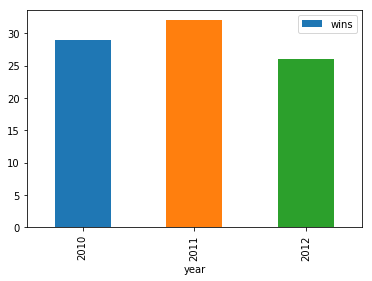

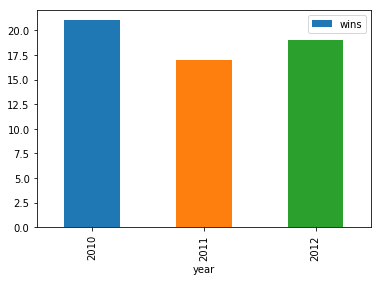

In [14]:
football[(football['team'] == 'RMadrid')].plot.bar(x='year', y='wins')
football[(football['team'] == 'ValenciaCF')].plot.bar(x='year', y='wins')

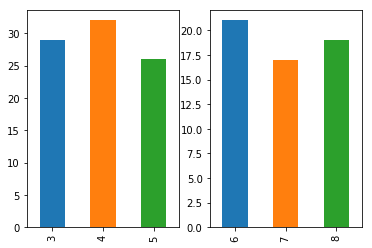

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)

football[football['team'] == 'RMadrid']['wins'].plot.bar(ax=axes[0])
football[football['team'] == 'ValenciaCF']['wins'].plot.bar(ax=axes[1])

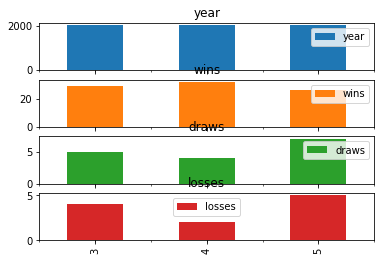

In [16]:
axes = football[football['team'] == 'RMadrid'].plot.bar(subplots=True)

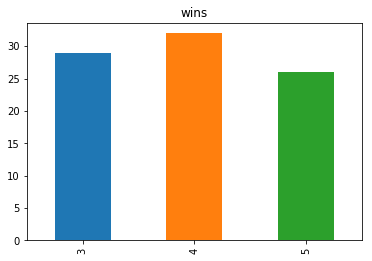

In [17]:
axes = football[football['team'] == 'RMadrid']['wins'].plot.bar(subplots=True)

In [18]:
football[['year', 'team', 'wins']]

,year,team,wins
0,2010,FCBarcelona,30
1,2011,FCBarcelona,28
2,2012,FCBarcelona,32
3,2010,RMadrid,29
4,2011,RMadrid,32
5,2012,RMadrid,26
6,2010,ValenciaCF,21
7,2011,ValenciaCF,17
8,2012,ValenciaCF,19


In [19]:
football.pivot(index='year', columns='team', values='wins')

team,FCBarcelona,RMadrid,ValenciaCF
year,,,
2010,30,29,21
2011,28,32,17
2012,32,26,19


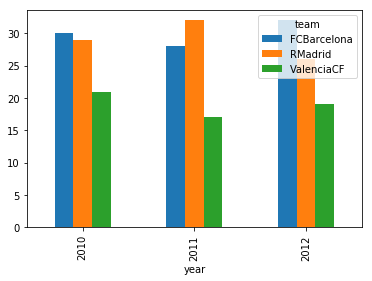

In [20]:
football.pivot(index='year', columns='team', values='wins').plot.bar()

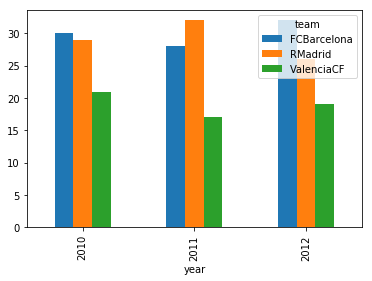

In [21]:
football.pivot(index='year', columns='team', values='wins').plot.bar()

## Adult Dataset Example

We will use the [Adult Dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). Begin by downloading the file `adult.data` and saving it somewhere nearby. Then we can read it into a data structure for further exploration.

### Vanilla Python data loading

In [22]:
# First, use "standard" python file opening, for posterity
file = open("data/adult.data", "r")

def str2int(a):
    """converts a string to an int if valid conversion"""
    return int(a) if a.isdigit() else 0

adults_data = []
count = 0
for line in file:
    # line will be a string of a line up until a newline
    row = line.split(', ') # transform string to list, splitting at delim
    count += 1
    if len(row) == 15:
        adults_data.append([
            str2int(row[0]), row[1],
            str2int(row[2]), row[3],
            str2int(row[4]), row[5],
            row[6], row[7], row[8],
            row[9], str2int(row[10]),
            str2int(row[11]), str2int(row[12]),
            row[13], row[14]
        ])
        
print(count)

32562


In [23]:
print(adults_data[1:2]) # use slicing so that it's still a "matrix"

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [24]:
len(adults_data)

32561

In [25]:
# Create a DataFrame
adults_frame = pd.DataFrame(adults_data)
adults_frame.columns = ['age', 'workclass', 'fnlwgt', 'education',
 'education-num', 'marital-status', 
 'occupation', 'relationship', 'race',
 'sex', 'capital_gain', 'capital_loss',
 'hr_per_week', 'country', 'income'
]
adults_frame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


### With Pandas

In [26]:
adults = pd.read_csv('data/adult.data',
                      header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ]
                     ) # Sigh, no headers provided
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
adults[1:3]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [28]:
adults.shape

(32561, 15)

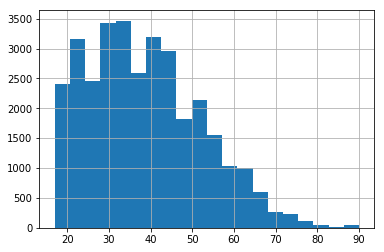

In [29]:
# plot a histogram
# each x is an age, the corresponding y is the number of
# rows that have that age
adults_age = adults['age'] # slice by column name!
adults_age.hist(density=0, histtype='stepfilled', bins=20)

In [30]:
#adults['age'].plot.bar()

In [31]:
males = adults[adults['sex'] == 'Male']
females = adults[adults['sex'] == 'Female']

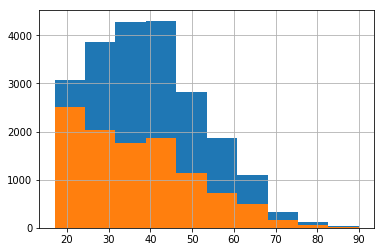

In [32]:
# Will plot the ages together

males['age'].hist()
females['age'].hist()

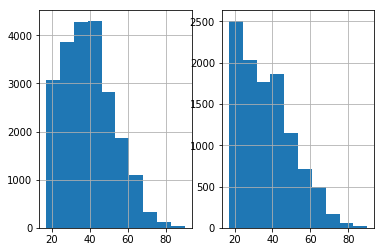

In [33]:
# plot separately

# gets handles to both the figure and the axes.
# matplotlib has more details
fig, axes = plt.subplots(nrows=1, ncols=2)

males['age'].hist(ax=axes[0])
females['age'].hist(ax=axes[1])

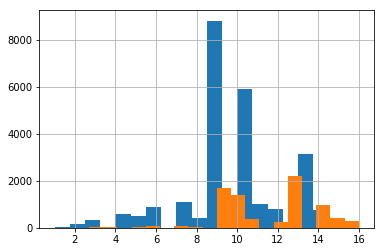

In [34]:
morethan = adults[adults['income'] == '>50K'][['education-num']]
lessthan = adults[adults['income'] == '<=50K'][['education-num']]

lessthan['education-num'].hist(bins=20)
morethan['education-num'].hist(bins=20)


In [35]:
morethan['education-num'].mean()

11.611656676444332

In [36]:
adults[['age', 'workclass']] #.groupby(by='workclass').count()

,age,workclass
0,39,State-gov
1,50,Self-emp-not-inc
2,38,Private
3,53,Private
4,28,Private
5,37,Private
6,49,Private
7,52,Self-emp-not-inc
8,31,Private
9,42,Private


In [37]:
adults.head(10)[['age', 'workclass', 'income']]

,age,workclass,income
0,39,State-gov,<=50K
1,50,Self-emp-not-inc,<=50K
2,38,Private,<=50K
3,53,Private,<=50K
4,28,Private,<=50K
5,37,Private,<=50K
6,49,Private,<=50K
7,52,Self-emp-not-inc,>50K
8,31,Private,>50K
9,42,Private,>50K


In [38]:
tmp = adults[['occupation', 'income', 'education-num']]

In [39]:
tmp[tmp['income'] == ">50K"]

,occupation,income,education-num
7,Exec-managerial,>50K,9
8,Prof-specialty,>50K,14
9,Exec-managerial,>50K,13
10,Exec-managerial,>50K,10
11,Prof-specialty,>50K,13
14,Craft-repair,>50K,11
19,Exec-managerial,>50K,14
20,Prof-specialty,>50K,16
25,Tech-support,>50K,13
27,?,>50K,10


In [40]:
occupations = tmp[tmp['income'] == ">50K"]['occupation']

def count_occs(occ):
    counter = 0
    for i in occupations:
        if i == occ:
            counter += 1
    return counter

query_job = 'Adm-clerical'
print(f"there are {count_occs(query_job)} {query_job}")

there are 507 Adm-clerical


In [41]:
tmp[tmp['income'] == ">50K"].groupby('occupation').count()

,income,education-num
occupation,,
?,191,191
Adm-clerical,507,507
Armed-Forces,1,1
Craft-repair,929,929
Exec-managerial,1968,1968
Farming-fishing,115,115
Handlers-cleaners,86,86
Machine-op-inspct,250,250
Other-service,137,137


In [42]:
# for jobs that make more than 50k, take the average education-num within each occupation
tmp[tmp['income'] == ">50K"][['occupation', 'education-num']].groupby('occupation').median()

,education-num
occupation,
?,11
Adm-clerical,10
Armed-Forces,14
Craft-repair,9
Exec-managerial,13
Farming-fishing,10
Handlers-cleaners,9
Machine-op-inspct,9
Other-service,10


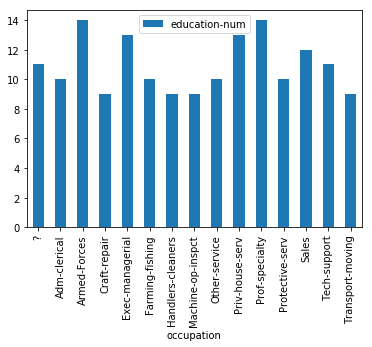

In [43]:
# for jobs that make more than 50k, take the average education-num within each occupation
tmp[(tmp['education-num'] > 0) & (tmp['income'] == ">50K")][['occupation', 'education-num']].groupby('occupation').median().plot.bar()

In [44]:
tmp[(tmp['education-num'] > 1) & (tmp['income'] == ">50K")].count()

occupation       7841
income           7841
education-num    7841
dtype: int64

In [45]:
min_years = 10
tmp[tmp['income'] == ">50K"].count() - tmp[(tmp['education-num'] > min_years) & (tmp['income'] == ">50K")].count()

occupation       3306
income           3306
education-num    3306
dtype: int64

In [46]:
 tmp[(tmp['education-num'] <= min_years) & (tmp['income'] == ">50K")].count()

occupation       3306
income           3306
education-num    3306
dtype: int64

## Grouping

Pattern:
1. Get a dataframe
2. Group by one or more of the columns
3. Run an aggregate (count within the group, take mean within group, etc.)

In [47]:
# for jobs that make more than 50k, take the average education-num within each occupation
occ_data = adults[['occupation','income']].groupby(['occupation'], as_index=True).count()
print(occ_data)

                   income
occupation               
?                    1843
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      4066
Farming-fishing       994
Handlers-cleaners    1370
Machine-op-inspct    2002
Other-service        3295
Priv-house-serv       149
Prof-specialty       4140
Protective-serv       649
Sales                3650
Tech-support          928
Transport-moving     1597


In [48]:
# for jobs that make more than 50k, take the average education-num within each occupation
occ_data = adults[['occupation', 'education-num', 'income']].groupby(['income', 'occupation']).count()
occ_data['education-num'].loc['<=50K']

occupation
?                    1652
Adm-clerical         3263
Armed-Forces            8
Craft-repair         3170
Exec-managerial      2098
Farming-fishing       879
Handlers-cleaners    1284
Machine-op-inspct    1752
Other-service        3158
Priv-house-serv       148
Prof-specialty       2281
Protective-serv       438
Sales                2667
Tech-support          645
Transport-moving     1277
Name: education-num, dtype: int64

In [49]:
plot_data = occ_data.reset_index()
plot_data

,income,occupation,education-num
0,<=50K,?,1652
1,<=50K,Adm-clerical,3263
2,<=50K,Armed-Forces,8
3,<=50K,Craft-repair,3170
4,<=50K,Exec-managerial,2098
5,<=50K,Farming-fishing,879
6,<=50K,Handlers-cleaners,1284
7,<=50K,Machine-op-inspct,1752
8,<=50K,Other-service,3158
9,<=50K,Priv-house-serv,148


In [50]:
plot_data = occ_data.reset_index().pivot(index='occupation', columns='income', values='education-num')

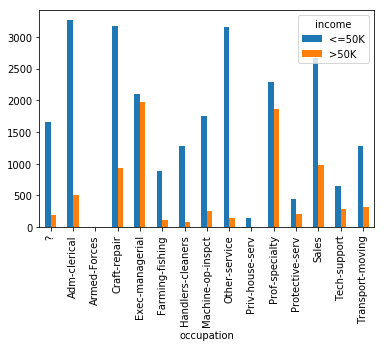

In [51]:
plot_data.plot.bar()

In [52]:
occ_data.shape

(30, 1)

In [53]:
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [54]:
[a for a in adults.head().iterrows()]

[(0, age                          39
  workclass             State-gov
  fnlwgt                    77516
  education             Bachelors
  education-num                13
  marital-status    Never-married
  occupation         Adm-clerical
  relationship      Not-in-family
  race                      White
  sex                        Male
  capital_gain               2174
  capital_loss                  0
  hr_per_week                  40
  country           United-States
  income                    <=50K
  Name: 0, dtype: object), (1, age                               50
  workclass           Self-emp-not-inc
  fnlwgt                         83311
  education                  Bachelors
  education-num                     13
  marital-status    Married-civ-spouse
  occupation           Exec-managerial
  relationship                 Husband
  race                           White
  sex                             Male
  capital_gain                       0
  capital_loss               

In [55]:
[val for ind, val in adults.head().iterrows()]

[age                          39
 workclass             State-gov
 fnlwgt                    77516
 education             Bachelors
 education-num                13
 marital-status    Never-married
 occupation         Adm-clerical
 relationship      Not-in-family
 race                      White
 sex                        Male
 capital_gain               2174
 capital_loss                  0
 hr_per_week                  40
 country           United-States
 income                    <=50K
 Name: 0, dtype: object, age                               50
 workclass           Self-emp-not-inc
 fnlwgt                         83311
 education                  Bachelors
 education-num                     13
 marital-status    Married-civ-spouse
 occupation           Exec-managerial
 relationship                 Husband
 race                           White
 sex                             Male
 capital_gain                       0
 capital_loss                       0
 hr_per_week             

In [56]:
[adult['education-num'] for ind, adult in adults.head(25).iterrows()]

[13,
 13,
 9,
 7,
 13,
 14,
 5,
 9,
 14,
 13,
 10,
 13,
 13,
 12,
 11,
 4,
 9,
 9,
 7,
 14,
 16,
 9,
 5,
 7,
 9]

In [57]:
squared_ed = [adult['education-num']**2 for ind,adult in adults.iterrows()]

In [58]:
adults.insert(1, 'squared-ed', squared_ed)

In [59]:
adults.head()

,age,squared-ed,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,169,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,169,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,81,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,49,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,169,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [60]:
adults.insert(1, 'num', 6)

In [61]:
adults.head()

,age,num,squared-ed,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,6,169,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,169,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,6,81,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,6,49,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,6,169,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
print(adults.head().to_latex())

\begin{tabular}{lrrrlrlrlllllrrrll}
\toprule
{} &  age &  num &  squared-ed &         workclass &  fnlwgt &  education &  education-num &      marital-status &         occupation &   relationship &   race &     sex &  capital\_gain &  capital\_loss &  hr\_per\_week &        country & income \\
\midrule
0 &   39 &    6 &         169 &         State-gov &   77516 &  Bachelors &             13 &       Never-married &       Adm-clerical &  Not-in-family &  White &    Male &          2174 &             0 &           40 &  United-States &  <=50K \\
1 &   50 &    6 &         169 &  Self-emp-not-inc &   83311 &  Bachelors &             13 &  Married-civ-spouse &    Exec-managerial &        Husband &  White &    Male &             0 &             0 &           13 &  United-States &  <=50K \\
2 &   38 &    6 &          81 &           Private &  215646 &    HS-grad &              9 &            Divorced &  Handlers-cleaners &  Not-in-family &  White &    Male &             0 &             0 &    

In [63]:
tmp = adults.head()[['education-num', 'age']]

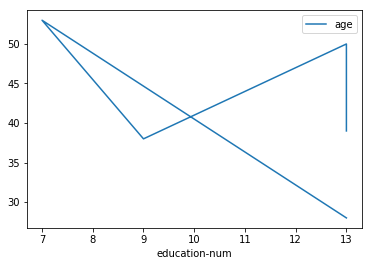

In [64]:
tmp.plot(x='education-num', y='age', kind='line') # bad

In [65]:
tmp.groupby(['education-num']).mean()

,age
education-num,
7,53
9,38
13,39


In [66]:
sum([28,39,50])/3

39.0

In [67]:
import numpy as np
print(adults.values.shape)

(32561, 17)


In [68]:
# How many males work in tech-support?
len(adults[(adults['occupation'] == 'Tech-support') & (adults['sex'] == 'Male')])

580

In [69]:
# 5c: for each country, which job has the most/highest proportion people that make over 50k?


In [88]:
adults['age']

0        39
1        50
2        38
3        53
4        28
5        37
6        49
7        52
8        31
9        42
10       37
11       30
12       23
13       32
14       40
15       34
16       25
17       32
18       38
19       43
20       40
21       54
22       35
23       43
24       59
25       56
26       19
27       54
28       39
29       49
         ..
32531    30
32532    34
32533    54
32534    37
32535    22
32536    34
32537    30
32538    38
32539    71
32540    45
32541    41
32542    72
32543    45
32544    31
32545    39
32546    37
32547    43
32548    65
32549    43
32550    43
32551    32
32552    43
32553    32
32554    53
32555    22
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

In [109]:
test = adults.head()

In [110]:
test[['age']].dtypes

age    int64
dtype: object

In [111]:
test.dtypes

age                int64
num                int64
squared-ed         int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hr_per_week        int64
country           object
income            object
dtype: object

In [115]:
test[['age']] = test[['age']].astype(str)

In [116]:
test.dtypes

age               object
num                int64
squared-ed         int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hr_per_week        int64
country           object
income            object
dtype: object

In [117]:
test[['age']] = test[['age']].astype(int)

In [118]:
test.dtypes

age                int64
num                int64
squared-ed         int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hr_per_week        int64
country           object
income            object
dtype: object

In [130]:
dates = pd.DataFrame({'date': ['02-05-1990', '15-05-2000'], 'att1': [1,2]})
dates

,date,att1
0,02-05-1990,1
1,15-05-2000,2


In [131]:
[v for v in dates.values]

[array(['02-05-1990', 1], dtype=object),
 array(['15-05-2000', 2], dtype=object)]

In [134]:
[row for row in dates.values if row[0].split('-')[1] == '05']

[array(['02-05-1990', 1], dtype=object),
 array(['15-05-2000', 2], dtype=object)]

In [121]:
s = '1-2-3'
s.split('-')

['1', '2', '3']

In [165]:
df1 = pd.DataFrame({'a': [1,2,3]})
df2 = pd.DataFrame({'a': [1,2,3,4]})


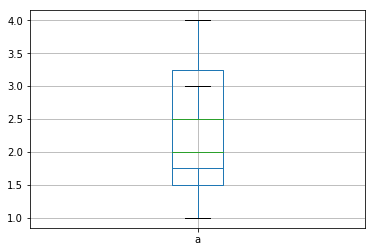

In [166]:
df1.boxplot(column='a')
df2.boxplot(column='a')

In [167]:
pd.concat([df1,df2], axis=1, join='outer')

,a,a
0,1.0,1
1,2.0,2
2,3.0,3
3,NaN,4


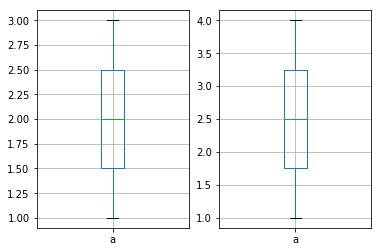

In [170]:
ig, (ax1, ax2) = plt.subplots(ncols=2)
ax = df1.boxplot(column='a', return_type='axes', ax=ax1)
df2.boxplot(column=['a'], ax=ax2)

In [173]:
adults

,age,num,squared-ed,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,6,169,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,6,169,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,6,81,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,6,49,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,6,169,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,6,196,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,6,25,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,6,81,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,6,196,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,6,169,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
